<a href="https://colab.research.google.com/github/raghavaraghav3/CS-5783/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
X_train = np.loadtxt("/content/drive/MyDrive/ML Practice/OSU_ML/Assignment2/X_train.csv")

In [81]:
X_test = np.loadtxt("/content/drive/MyDrive/ML Practice/OSU_ML/Assignment2/X_test.csv")

In [82]:
Y_train = np.loadtxt("/content/drive/MyDrive/ML Practice/OSU_ML/Assignment2/Y_train.csv")

In [8]:
Y_test = np.loadtxt("/content/drive/MyDrive/ML Practice/OSU_ML/Assignment2/Y_test.csv")

1. As this is a regression problem we use Linear function for the output layer.

In [83]:
#Activation functions
def sigmoid_fun(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(z):
    return sigmoid_fun(z)*(1-sigmoid_fun(z))

def ReLU(x):
    return max(0, x)

def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1- np.tanh(x)*np.tanh(x)

def linear_fun(x):
    return x

2. We use only one neuron in the final layer as it is regression and need to predict only one value.

In [84]:
#initializing biases and weights
def biasWeights_fun(numofneurons):
    w1 = np.random.rand(numofneurons, 2)
    b1 = np.random.rand(numofneurons, 1)
    w2 = np.random.rand(1, numofneurons)
    b2 = np.random.rand(1,1)
    return w1, b1, w2, b2

In [85]:
#Calculating Mean Root Square Error
def MSE(y_predict, y):
    return np.square(np.subtract(y,y_predict)).mean()

In [86]:
def Accuracy(y_predicted, y):
    correct = 0
    wrong = 0
    total = 0
    diff =y - y_predicted
    for ech in diff:
        total= total+1
        if ech[0] > 1:
            wrong = wrong + 1
        if ech[0] < 1:
            correct = correct + 1
    return (correct/total)*100

In [87]:
def forward_propagation(num_neu,  w1, b1, w2, b2):
    z1 = np.dot(w1, X_train.T) + b1
    a1 = sigmoid_fun(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = (z2)
    return z1, a1, z2, a2, w1, b1, w2, b2


In [88]:
numofneu = 3
w1, b1, w2, b2 = biasWeights_fun(numofneu)
z1, a1, z2, a2, w1, b1, w2, b2 = forward_propagation(numofneu, w1, b1, w2, b2 )

In [89]:
def back_propagation(z_1, a_1, z_2, a_2, w_1, b_1, w_2, b_2, alpha, itera, numofneu ):
    MSEvsITERATIONS_train = []
    MSEvsITERATIONS_test = []
    ACCvsITERATIONS_train = []
    ACCvsITERATIONS_test = []

    for i in range(itera):
        dw2 = (np.dot((a_2 - Y_train), a_1.T))
        db2 = np.reshape((np.mean((a_2-Y_train), axis=1)), (1,1))
        dw1 = np.dot(np.dot(w_2.T, (a_2-Y_train)) * ((1-a_1) * a_1), X_train)
        db1 = np.reshape((np.mean((np.dot(w_2.T, (a_2-Y_train)) * ((1-a_1) * a_1)),axis =1)), (numofneu,1))
        
        w_1 = w_1 - (alpha * dw1)
        b_1 = b_1 - (alpha * db1)
        w_2 = w_2 - (alpha * dw2)
        b_2 = b_2 - (alpha * db2)

        temp_z1 = np.dot(w_1, X_test.T) + b_1
        temp_a1 = sigmoid_fun(temp_z1)
        temp_z2 = np.dot(w_2, temp_a1) + b_2
        temp_a2 = (temp_z2) 

        z1, a1, z2, a2, w1, b1, w2, b2 = forward_propagation(numofneu, w_1, b_1, w_2, b_2)
        a_2 = a2

        MSEvsITERATIONS_train.append(MSE(a_2.T, Y_train.reshape(100, 1)))
        MSEvsITERATIONS_test.append(MSE(temp_a2.T, Y_test.reshape(50,1)))
        ACCvsITERATIONS_train.append(Accuracy(a_2.T, Y_train.reshape(100, 1)))
        ACCvsITERATIONS_test.append(Accuracy(temp_a2.T, Y_test.reshape(50,1)))

    return MSEvsITERATIONS_train, MSEvsITERATIONS_test,  ACCvsITERATIONS_train, ACCvsITERATIONS_test

  
iterations= 1000
training_MSE, test_MSE, training_ACC, test_ACC = back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.01, iterations, numofneu)
print(training_MSE)
print(test_MSE)
print(training_ACC)
print(test_ACC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[3528.663852274171, 3818.7567052033073, 3709.063874391664, 3731.8068635918626, 3713.6352560641435, 3705.174036763381, 3692.749566668215, 3681.9587178848965, 3671.688196916424, 3662.1134859935305, 3652.861216825749, 3643.8826628839106, 3635.1709694456713, 3626.7352448653096, 3618.5796458150935, 3610.707250594592, 3603.1196044207345, 3595.816328235952, 3588.786563929769, 3581.945930804706, 3574.9200284675794, 3568.6167231952395, 3564.588772212502, 3537.475831029068, 3220.0342193648803, 2513.4237612005363, 2446.45922726516, 2402.627480230616, 2358.397774976472, 2297.9278007313887, 2259.7015970945868, 2232.416652273064, 1648.628478357196, 1561.9468555411427, 1564.692236476988, 1556.6713586281812, 1552.7822149619326, 1550.113858457804, 1548.0013728478755, 1546.1965715342078, 1544.5402602520273, 1542.767025815459, 1537.9664164457997, 1523.2718160573215, 1522.0507726798312, 1525.4560465058664, 1529.1073803697614, 1533.1808855003665, 1537.5135809285514, 1506.3994590414613, 1512.0295471031247, 

Text(0.5, 1.0, 'Iterations vs MSE')

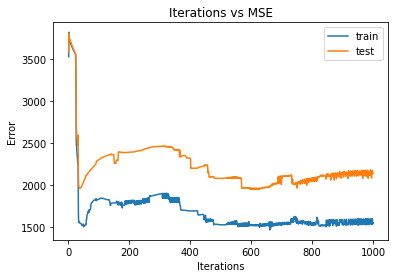

In [90]:
# 4. MSE vs Iterations
plt.plot(np.arange(1, iterations+1), training_MSE, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Iterations vs MSE")

Text(0.5, 1.0, 'Iterations vs Accuracy')

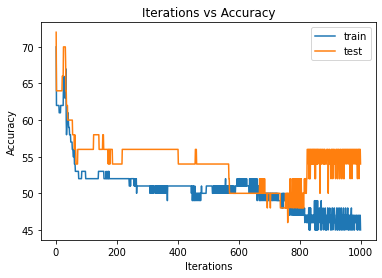

In [91]:
# 4. Accuracy vs Iterations
plt.plot(np.arange(1, iterations+1),training_ACC ,label="train")
plt.plot(np.arange(1, iterations+1),test_ACC ,label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")

5. Varying Learning rate to check the impact. As the learning rate keeps increasing, the accuracy keeps decreasing.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Accuracy')

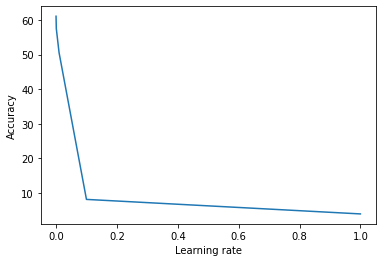

In [92]:
training_MSE1, test_MSE1, acc_tr1, acc_test1= back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.0001, iterations, numofneu)
training_MSE2, test_MSE2, acc_tr2, acc_test2= back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.001, iterations, numofneu)
training_MSE3, test_MSE3, acc_tr3, acc_test3= back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.01, iterations, numofneu)
training_MSE4, test_MSE4, acc_tr4, acc_test4= back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.1, iterations, numofneu)
training_MSE5, test_MSE5, acc_tr5, acc_test5= back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 1, iterations, numofneu)

plt.plot([0.0001,0.001,0.01,0.1,1] , [np.mean(acc_tr1), np.mean(acc_tr2), np.mean(acc_tr3), np.mean(acc_tr4), np.mean(acc_tr5)] )
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")

6. Varying number of neurons in hidden layer(function is already implemented to generate weights and biases and in backprog and foward prop method we need to pass number of neurons(it should be same in both functions).I executed it multiple times but found it we are able to get good fit in about 2 to 3 neurons.If we go beyond that we are overfitting and accuracy also doesnt improve that much and start to decrease.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '1. Iterations vs MSE')

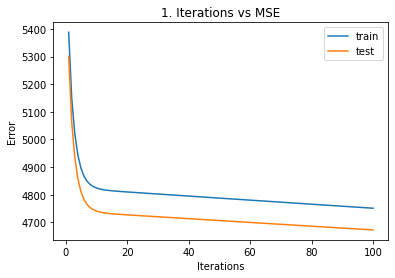

In [96]:
iterations =100
num_neu =1
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, P1, Q1, P2, Q2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE1, test_MSE1, training_ACC1, test_ACC1 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE1, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE1, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("1. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '2. Iterations vs MSE')

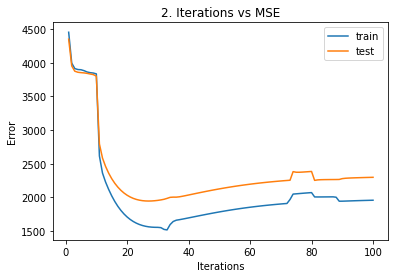

In [97]:
num_neu =2
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE2, test_MSE2, training_ACC2, test_ACC2 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE2, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE2, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("2. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '3. Iterations vs MSE')

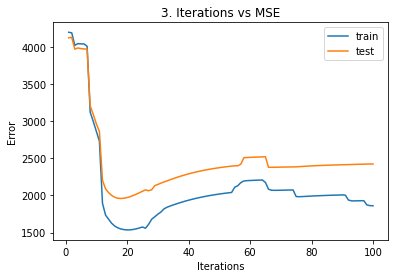

In [98]:
num_neu =3
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE3, test_MSE3, training_ACC3, test_ACC3 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE3, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE3, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("3. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '4. Iterations vs MSE')

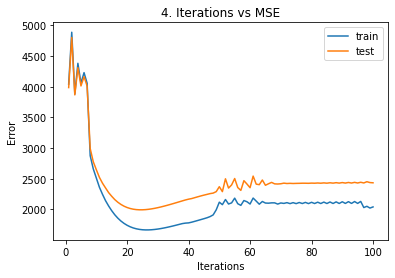

In [99]:
num_neu =4
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE4, test_MSE4, training_ACC4, test_ACC4 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE4, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE4, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("4. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '5. Iterations vs MSE')

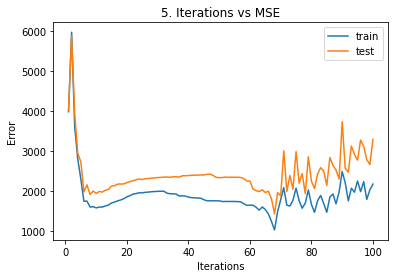

In [100]:
num_neu =5
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE5, test_MSE5, training_ACC5, test_ACC5 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE5, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE5, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("5. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '6. Iterations vs MSE')

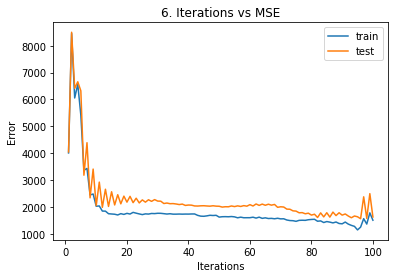

In [101]:
num_neu =6
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE6, test_MSE6, training_ACC6, test_ACC6 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE6, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE6, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("6. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '7. Iterations vs MSE')

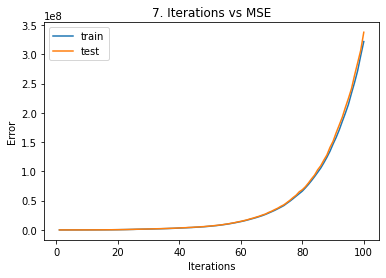

In [102]:
num_neu =7
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE7, test_MSE7, training_ACC7, test_ACC7 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE7, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE7, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("7. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '8. Iterations vs MSE')

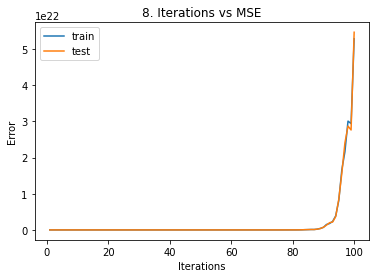

In [103]:
num_neu =8
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE8, test_MSE8, training_ACC8, test_ACC8 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE8, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE8, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("8. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '9. Iterations vs MSE')

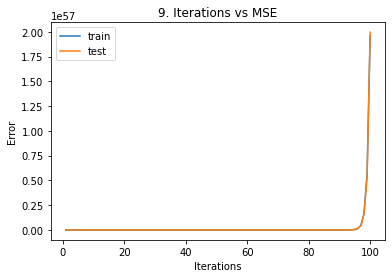

In [104]:
num_neu =9
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE9, test_MSE9, training_ACC9, test_ACC9 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE9, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE9, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("9. Iterations vs MSE")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '10. Iterations vs MSE')

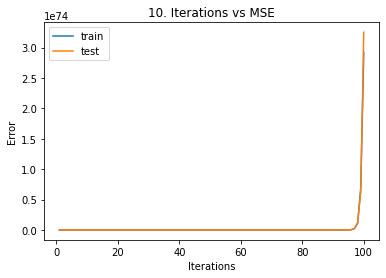

In [105]:
num_neu =10
p1, q1, p2, q2 = biasWeights_fun(num_neu)
Z1, A1, Z2, A2, W1, B1, W2, B2 = forward_propagation(num_neu, p1, q1, p2, q2 )
training_MSE10, test_MSE10, training_ACC10, test_ACC10 = back_propagation(Z1, A1, Z2, A2, P1, Q1, P2, Q2, 0.01, iterations, num_neu)

plt.plot(np.arange(1, iterations+1), training_MSE10, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE10, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("10. Iterations vs MSE")


6.a As there is no change in activation function, there is no need to change the chain rule of derivation.

6.b As we can see that the loss stagnates from 2 to 4 neurons and later it over fits and the error keeps increasing. The accuracy keepd decreasing after 4 neurons.

7. Regression using Linear activation function. The update rule changes based on the activation rules and the output derived from that. This is results in the varying weights and biases updation.
  
7.a The update rule should be changed.
  
7.b Each activation function has its own derivatives. So the derivatives wrt to the activation function should change.

In [106]:
def back_propagation_linear(z_1, a_1, z_2, a_2, w_1, b_1, w_2, b_2, alpha, itera, numofneu ):
    MSEvsITERATIONS_train = []
    MSEvsITERATIONS_test = []
    ACCvsITERATIONS_train = []
    ACCvsITERATIONS_test = []

    for i in range(itera):
        dw2 = (np.dot((a_2 - Y_train), a_1.T))
        db2 = np.reshape((np.mean((a_2-Y_train), axis=1)), (1,1))
        dw1 = np.dot(np.dot(w_2.T, (a_2-Y_train)), X_train)
        db1 = np.reshape((np.mean((np.dot(w_2.T, (a_2-Y_train))),axis =1)), (numofneu,1))
        
        w_1 = w_1 - (alpha * dw1)
        b_1 = b_1 - (alpha * db1)
        w_2 = w_2 - (alpha * dw2)
        b_2 = b_2 - (alpha * db2)

        temp_z1 = np.dot(w_1, X_test.T) + b_1
        temp_a1 = sigmoid_fun(temp_z1)
        temp_z2 = np.dot(w_2, temp_a1) + b_2
        temp_a2 = (temp_z2) 

        z1, a1, z2, a2, w1, b1, w2, b2 = forward_propagation(numofneu, w_1, b_1, w_2, b_2)
        a_2 = a2

        MSEvsITERATIONS_train.append(MSE(a_2.T, Y_train.reshape(100, 1)))
        MSEvsITERATIONS_test.append(MSE(temp_a2.T, Y_test.reshape(50,1)))
        ACCvsITERATIONS_train.append(Accuracy(a_2.T, Y_train.reshape(100, 1)))
        ACCvsITERATIONS_test.append(Accuracy(temp_a2.T, Y_test.reshape(50,1)))

    return MSEvsITERATIONS_train, MSEvsITERATIONS_test,  ACCvsITERATIONS_train, ACCvsITERATIONS_test

  
iterations= 1000
training_MSE, test_MSE, training_ACC, test_ACC = back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.01, iterations, numofneu)
print(training_MSE)
print(test_MSE)
print(training_ACC)
print(test_ACC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[3528.663852274171, 3818.7567052033073, 3709.063874391664, 3731.8068635918626, 3713.6352560641435, 3705.174036763381, 3692.749566668215, 3681.9587178848965, 3671.688196916424, 3662.1134859935305, 3652.861216825749, 3643.8826628839106, 3635.1709694456713, 3626.7352448653096, 3618.5796458150935, 3610.707250594592, 3603.1196044207345, 3595.816328235952, 3588.786563929769, 3581.945930804706, 3574.9200284675794, 3568.6167231952395, 3564.588772212502, 3537.475831029068, 3220.0342193648803, 2513.4237612005363, 2446.45922726516, 2402.627480230616, 2358.397774976472, 2297.9278007313887, 2259.7015970945868, 2232.416652273064, 1648.628478357196, 1561.9468555411427, 1564.692236476988, 1556.6713586281812, 1552.7822149619326, 1550.113858457804, 1548.0013728478755, 1546.1965715342078, 1544.5402602520273, 1542.767025815459, 1537.9664164457997, 1523.2718160573215, 1522.0507726798312, 1525.4560465058664, 1529.1073803697614, 1533.1808855003665, 1537.5135809285514, 1506.3994590414613, 1512.0295471031247, 

Text(0, 0.5, 'Error')

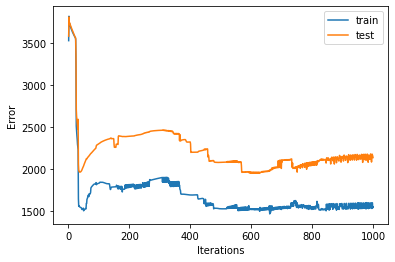

In [107]:
plt.plot(np.arange(1, iterations+1), training_MSE, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Linear Activation")

Regression using tanH activation function

In [108]:
def back_propagation_tanh(z_1, a_1, z_2, a_2, w_1, b_1, w_2, b_2, alpha, itera, numofneu ):
    MSEvsITERATIONS_train = []
    MSEvsITERATIONS_test = []
    ACCvsITERATIONS_train = []
    ACCvsITERATIONS_test = []

    for i in range(itera):
        dw2 = (np.dot((a_2 - Y_train), a_1.T))
        db2 = np.reshape((np.mean((a_2-Y_train), axis=1)), (1,1))
        dw1 = np.dot(np.dot(w_2.T, (a_2-Y_train))* (1 + tanh(z_1)) * (1 - tanh(z_1)), X_train)
        db1 = np.reshape((np.mean((np.dot(w_2.T, (a_2-Y_train))* (1 + tanh(z_1)) * (1 - tanh(z_1))),axis =1)), (numofneu,1))
        
        w_1 = w_1 - (alpha * dw1)
        b_1 = b_1 - (alpha * db1)
        w_2 = w_2 - (alpha * dw2)
        b_2 = b_2 - (alpha * db2)

        temp_z1 = np.dot(w_1, X_test.T) + b_1
        temp_a1 = sigmoid_fun(temp_z1)
        temp_z2 = np.dot(w_2, temp_a1) + b_2
        temp_a2 = (temp_z2) 

        z1, a1, z2, a2, w1, b1, w2, b2 = forward_propagation(numofneu, w_1, b_1, w_2, b_2)
        a_2 = a2

        MSEvsITERATIONS_train.append(MSE(a_2.T, Y_train.reshape(100, 1)))
        MSEvsITERATIONS_test.append(MSE(temp_a2.T, Y_test.reshape(50,1)))
        ACCvsITERATIONS_train.append(Accuracy(a_2.T, Y_train.reshape(100, 1)))
        ACCvsITERATIONS_test.append(Accuracy(temp_a2.T, Y_test.reshape(50,1)))

    return MSEvsITERATIONS_train, MSEvsITERATIONS_test,  ACCvsITERATIONS_train, ACCvsITERATIONS_test

  
iterations= 1000
training_MSE, test_MSE, training_ACC, test_ACC = back_propagation(z1, a1, z2, a2, w1, b1, w2, b2, 0.01, iterations, numofneu)
print(training_MSE)
print(test_MSE)
print(training_ACC)
print(test_ACC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[3528.663852274171, 3818.7567052033073, 3709.063874391664, 3731.8068635918626, 3713.6352560641435, 3705.174036763381, 3692.749566668215, 3681.9587178848965, 3671.688196916424, 3662.1134859935305, 3652.861216825749, 3643.8826628839106, 3635.1709694456713, 3626.7352448653096, 3618.5796458150935, 3610.707250594592, 3603.1196044207345, 3595.816328235952, 3588.786563929769, 3581.945930804706, 3574.9200284675794, 3568.6167231952395, 3564.588772212502, 3537.475831029068, 3220.0342193648803, 2513.4237612005363, 2446.45922726516, 2402.627480230616, 2358.397774976472, 2297.9278007313887, 2259.7015970945868, 2232.416652273064, 1648.628478357196, 1561.9468555411427, 1564.692236476988, 1556.6713586281812, 1552.7822149619326, 1550.113858457804, 1548.0013728478755, 1546.1965715342078, 1544.5402602520273, 1542.767025815459, 1537.9664164457997, 1523.2718160573215, 1522.0507726798312, 1525.4560465058664, 1529.1073803697614, 1533.1808855003665, 1537.5135809285514, 1506.3994590414613, 1512.0295471031247, 

Text(0.5, 1.0, 'TanH Activation')

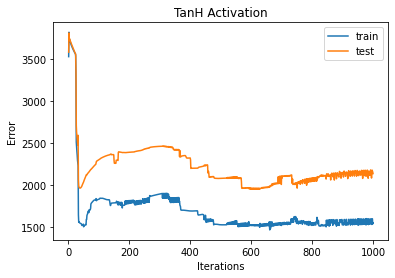

In [109]:
plt.plot(np.arange(1, iterations+1), training_MSE, label="train")
plt.plot(np.arange(1, iterations+1), test_MSE, label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title('TanH Activation')